In [178]:
from bs4 import BeautifulSoup
import requests

all_reviews_list = []
for i in range(0, 37):
    url = "https://www.airlinequality.com/airline-reviews/british-airways/page/" + str(i) + "/?sortby=post_date%3ADesc&pagesize=100"
    html = requests.get(url)
    print("Retrieved " + str(i) + " page out of 36")
    
    soup = BeautifulSoup(html.content, "html.parser")
    results = soup.find(id="content")
    all_reviews = results.find_all("div", class_="tc_mobile")

    
    for review in all_reviews:
        review_text = review.find("div", class_="text_content")
        all_reviews_list.append(review_text.text)

print("All the pages parsed!")

Retrieved 0 page out of 36
Retrieved 1 page out of 36
Retrieved 2 page out of 36
Retrieved 3 page out of 36
Retrieved 4 page out of 36
Retrieved 5 page out of 36
Retrieved 6 page out of 36
Retrieved 7 page out of 36
Retrieved 8 page out of 36
Retrieved 9 page out of 36
Retrieved 10 page out of 36
Retrieved 11 page out of 36
Retrieved 12 page out of 36
Retrieved 13 page out of 36
Retrieved 14 page out of 36
Retrieved 15 page out of 36
Retrieved 16 page out of 36
Retrieved 17 page out of 36
Retrieved 18 page out of 36
Retrieved 19 page out of 36
Retrieved 20 page out of 36
Retrieved 21 page out of 36
Retrieved 22 page out of 36
Retrieved 23 page out of 36
Retrieved 24 page out of 36
Retrieved 25 page out of 36
Retrieved 26 page out of 36
Retrieved 27 page out of 36
Retrieved 28 page out of 36
Retrieved 29 page out of 36
Retrieved 30 page out of 36
Retrieved 31 page out of 36
Retrieved 32 page out of 36
Retrieved 33 page out of 36
Retrieved 34 page out of 36
Retrieved 35 page out of 36
Re

In [179]:
print("Reviews retrieved: ", len(all_reviews_list))

Reviews retrieved:  3671


In [180]:
print("SAMPLE REVIEW: ", all_reviews_list[2000])

SAMPLE REVIEW:  ✅ Verified Review |  I was pleasantly surprised by the experience, first time for premium economy with this particular airline. The seat was comfortable with ample legroom, the food was excellent for airline food and both ground staff and flight crew were friendly and efficient. The flight was quiet and smooth, on time and made up time on the flight. The only downside was that the inflight entertainment stopped working after one hour, despite the crews efforts it could not be restored for the remainder of the flight. We did note one steward enter the premium economy cabin with a list and upgraded about 15 people into business, the rest of us went without for 8 hours. It worked fine on the return journey and I guess it's just one of those things, just annoyed me that a certain selected few were upgraded and the rest ignored.


In [181]:
import nltk

tokenized_reviews = []

print("Tokenizing each review")
count = 0
for review in all_reviews_list:
    tokenized_reviews.append(nltk.word_tokenize(review))

print("Reviews tokenized: " + str(len(tokenized_reviews)))
print("Sample tokenized review:", tokenized_reviews[2000])

Tokenizing each review
Reviews tokenized: 3671
Sample tokenized review: ['✅', 'Verified', 'Review', '|', 'I', 'was', 'pleasantly', 'surprised', 'by', 'the', 'experience', ',', 'first', 'time', 'for', 'premium', 'economy', 'with', 'this', 'particular', 'airline', '.', 'The', 'seat', 'was', 'comfortable', 'with', 'ample', 'legroom', ',', 'the', 'food', 'was', 'excellent', 'for', 'airline', 'food', 'and', 'both', 'ground', 'staff', 'and', 'flight', 'crew', 'were', 'friendly', 'and', 'efficient', '.', 'The', 'flight', 'was', 'quiet', 'and', 'smooth', ',', 'on', 'time', 'and', 'made', 'up', 'time', 'on', 'the', 'flight', '.', 'The', 'only', 'downside', 'was', 'that', 'the', 'inflight', 'entertainment', 'stopped', 'working', 'after', 'one', 'hour', ',', 'despite', 'the', 'crews', 'efforts', 'it', 'could', 'not', 'be', 'restored', 'for', 'the', 'remainder', 'of', 'the', 'flight', '.', 'We', 'did', 'note', 'one', 'steward', 'enter', 'the', 'premium', 'economy', 'cabin', 'with', 'a', 'list', 'a

In [182]:
from nltk.corpus import stopwords

print("converting to lowercase all the tokens in all reviews")

reviews_to_filter = []
for tokenized_review in tokenized_reviews:
    reviews = []
    for token in tokenized_review:
        reviews.append(token.lower())
    reviews_to_filter.append(reviews)

print("Converted to lowercase all the reviews:", len(reviews_to_filter))

converting to lowercase all the tokens in all reviews
Converted to lowercase all the reviews: 3671


In [216]:
from wordcloud import STOPWORDS

# Defining all the stopwords:
# stopwords from nltk:
stopWords = stopwords.words('english')
# Custom stopwords: punctuation and etc
stopWords.extend(
        ["'", "''", "``", "-", "–", "–", "...", ".", ",", ";", "?", "!", "%", "$", "/", ":", ")",
         "(", "!", '"', "#", "$", "%", "&", "'", "(", ")", "*", "+", "-", ".", "/",
         ":", ";", "<", "=", ">", "?", "@", "[", "\"", "]", "^", "_", "`", "{", "|", "}", "~", "”", "“", "—", "»", "|",
        "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "✅", "'s", "h.", "``", "'ve", "❎"])
# Stopwords from WordCloud
stopWords.extend(STOPWORDS)

# https://www.kaggle.com/datasets/rowhitswami/stopwords?resource=download
# Downloaded extended list of English stopwords
with open("stopwords.txt") as file:
    wordsExtend = file.read()

# Adding list of stopwords from text file to the stop_words list
list_of_extend_stopwords = []
list_of_extend_stopwords.append(wordsExtend.split("\n"))
list_of_extend_stopwords = list_of_extend_stopwords[0]

# Compiling all the stopwords in one list:
stop_words = set(stopWords)
stop_words.update(list_of_extend_stopwords)
stop_words.update(["unverified", "verified review", "british", "airway", "british airway", "ba", "lhr","trip verified", "trip", "verified","day","given", "told", "cabin crew", "still", "back", "got", "n't"])

print("Cleaning tokens from stopwords:")
cleaned_reviews = []
for review_to_filter in reviews_to_filter:
    tokens_filtered = []
    for token in review_to_filter:
        if token not in stop_words:
            tokens_filtered.append(token)
    cleaned_reviews.append(tokens_filtered)
print("Number of tokens of sample review before cleaning: ", str(len(reviews_to_filter[2000])))
print("Number of tokens after cleaning in sample review: ", len(cleaned_reviews[2000]))

Cleaning tokens from stopwords:
Number of tokens of sample review before cleaning:  160
Number of tokens after cleaning in sample review:  64


In [127]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/dastanzhas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [217]:
from nltk.stem import WordNetLemmatizer

# Using nltk WordNetLemmatizer to lemmatize the tokens of reviews:
lemmatizer = WordNetLemmatizer()

print("Starting lemmatizing...")
lemmatized_documents = []
for review in cleaned_reviews:
    lemmatized_review = []
    for token in review:
        lemmatized_review.append(lemmatizer.lemmatize(token))
    lemmatized_documents.append(lemmatized_review)

# I'll call the reviews --> documents now

print("Finished lemmatizing " + str(len(lemmatized_documents)) + " documents")
print("Lemmatized sample review: ", lemmatized_documents[2000])

Starting lemmatizing...
Finished lemmatizing 3671 documents
Lemmatized sample review:  ['review', 'pleasantly', 'surprised', 'experience', 'first', 'time', 'premium', 'economy', 'airline', 'seat', 'comfortable', 'ample', 'legroom', 'food', 'excellent', 'airline', 'food', 'ground', 'staff', 'flight', 'crew', 'friendly', 'efficient', 'flight', 'quiet', 'smooth', 'time', 'made', 'time', 'flight', 'downside', 'inflight', 'entertainment', 'working', 'hour', 'crew', 'effort', 'restored', 'remainder', 'flight', 'note', 'steward', 'enter', 'premium', 'economy', 'cabin', 'list', 'upgraded', '15', 'people', 'business', 'rest', 'went', 'hour', 'worked', 'fine', 'return', 'journey', 'guess', 'annoyed', 'selected', 'upgraded', 'rest', 'ignored']


# Lemmatizing is a process of reducing the word to its lemma form
# Lemmatisation (or lemmatization) in linguistics is the process of grouping together 
# the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.
lemmatizer.lemmatize('choices')

In [218]:
!pip install wordcloud

In [219]:
# Write all the tokens in all reviews into a single document in order to make WordCloud from it
all_tokens_wordcloud = []

for document in lemmatized_documents:
    for token in document:
        all_tokens_wordcloud.append(token)

with open("fileWordCloud.txt", "w") as f:
    for token in all_tokens_wordcloud:
        f.write(token + " ")

print("Putting all the tokens from all documents in one list to make wordcloud")
print("All tokens in a fileWordCloud.txt text file")

Putting all the tokens from all documents in one list to make wordcloud
All tokens in a fileWordCloud.txt text file


In [220]:
print("All tokens after cleaning:", len(all_tokens_wordcloud))

All tokens after cleaning: 262069


In [221]:
from wordcloud import WordCloud, STOPWORDS

# Reading all the tokens from all documents in order to make wordcloud:
with open("fileWordCloud.txt","r") as fh:
        file_data = fh.read()

print("Making wordcloud from all of the tokens in all of the documents we scraped from website...")

stop_words.update(["verified review", "british", "airway", "british airway", "ba", "lhr","trip verified", "trip", "verified","day","given", "told", "cabin crew", "still", "back", "got", "n't"])
WC = WordCloud(stopwords=stop_words, max_words=50, background_color="white").generate(file_data)

print("Finished making wordcloud")

Making wordcloud from all of the tokens in all of the documents we scraped from website...
Finished making wordcloud


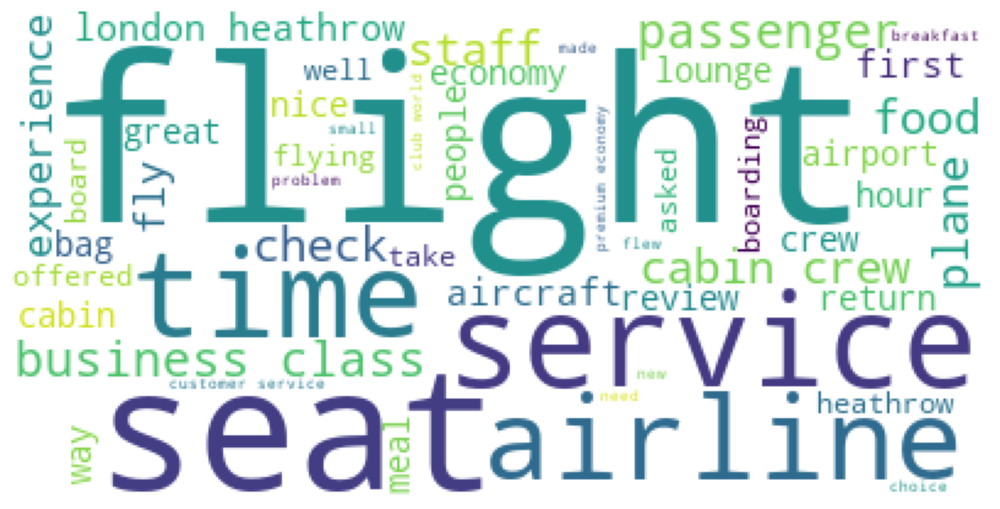

In [222]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Drawing wordcloud from the WC we made in above cell
rcParams["figure.figsize"] = (10, 5)
plt.imshow(WC)
plt.axis("off")
plt.show()

In [223]:
# Creating Frequency Disctributions from all tokens from all documents
fd = nltk.FreqDist(all_tokens_wordcloud)
fd.most_common(5)

[('flight', 7727),
 ('seat', 4455),
 ('service', 2952),
 ('time', 2409),
 ('food', 2333)]

In [224]:
fd.tabulate(10)

 flight    seat service    time    food    crew  london  airway   cabin   class 
   7727    4455    2952    2409    2333    2189    2156    2116    2015    1859 


# In the context of NLP, a concordance is a collection of word locations along with their context. You can use concordances to find:
#    How many times a word appears
#    Where each occurrence appears
#    What words surround each occurrence

In [225]:
# In NLTK, you can do this by calling .concordance(). 
# To use it, we need an instance of the nltk.Text class, which can also be constructed with a word list.
# Before invoking .concordance(), 
# build a new word list from the original corpus text so that all the context, even stop words, will be there:

In [226]:
### Write all the tokens, even stop words in all reviews into a single document in order to make .concordance from it
all_tokens_concordance = []

reviews_to_filter

for document in reviews_to_filter:
    for token in document:
        all_tokens_concordance.append(token)

with open("fileAllTotalConcordance.txt", "w") as f:
    for token in all_tokens_concordance:
        f.write(token + " ")

print("Putting all the tokens(even STOPWORDS) from all documents in one list to make .concordance()")
print("All tokens in a fileAllTotalConcordance.txt text file")

Putting all the tokens(even STOPWORDS) from all documents in one list to make .concordance()
All tokens in a fileAllTotalConcordance.txt text file


In [227]:
total_tokens = []

# Reading all tokens, even stopwords from file:
with open("fileAllTotalConcordance.txt", "r") as f:
    total_tokens = f.read()

all_tokens = []
all_tokens.append(total_tokens.split(" "))

all_tokens = all_tokens[0]
 
# Deleting all occurences of unwanted tokens that appear at the start of each review(document)
to_delete_list = ["✅", "trip verified", "not verified", "verified", "trip", "not", "|"]

for item in to_delete_list:
    all_tokens = list(filter(lambda x: x != item, all_tokens))

print("All tokens written in list: all_tokens")
print("Total amount of tokens with stopwords without cleaning: ", len(all_tokens))

All tokens written in list: all_tokens
Total amount of tokens with stopwords without cleaning:  646820


In [228]:
# Building concordance and checking concordance of the specific tokens:
text = nltk.Text(all_tokens)

text.concordance("love", lines=5)

Displaying 5 of 40 matches:
 with excellent bar-cart service . i love the 'double'-servings of drinks . en
ng club in ba is still wonderful . i love it ! very poor service , very frustr
 with excellent bar-cart service . i love the 'double'-servings of drinks . en
ng club in ba is still wonderful . i love it ! very poor service , very frustr
line in customer service . i used to love this airline and now i have had thre


# Making list of concordance:

In [229]:
concordance_list = text.concordance_list("love", lines=2)

for entry in concordance_list:
    print(entry.line)

 with excellent bar-cart service . i love the 'double'-servings of drinks . en
ng club in ba is still wonderful . i love it ! very poor service , very frustr


In [230]:
fd_text = text.vocab()  # Equivalent to fd = nltk.FreqDist(words)

In [231]:
fd_text

FreqDist({'.': 34665, 'the': 29514, 'to': 19584, 'and': 18178, ',': 14188, 'a': 13427, 'was': 13181, 'i': 11517, 'of': 8470, 'in': 8393, ...})

# Collocations can be made up of two or more words. NLTK provides classes to handle several types of collocations:
#    Bigrams: Frequent two-word combinations
#    Trigrams: Frequent three-word combinations
#    Quadgrams: Frequent four-word combinations


In [232]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(all_tokens)

In [233]:
finder.ngram_fd.most_common(2)

[(('with', 'british', 'airways'), 485), (('.', 'i', 'was'), 465)]

In [234]:
finder.ngram_fd.tabulate(2)

('with', 'british', 'airways')              ('.', 'i', 'was') 
                           485                            465 


# NLTK Sentiment Analyzer
# VADER pretrained nltk sentiment analyzer model

In [146]:
# Download vader pretrained model
!python -m nltk.downloader vader_lexicon

/home/dastanzhas/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.8/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dastanzhas/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [235]:
from nltk.sentiment import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()
sentiment_analyzer.polarity_scores("this is great")

{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6249}

In [236]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dastanzhas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Tagging all tokens in all documents using pos_tag in NLTK

In [237]:
from nltk import pos_tag

tagged_documents = []

for document in lemmatized_documents:
    tagged_documents.append(pos_tag(document))

In [238]:
without_nouns = []

for document in tagged_documents:
    without_noun = []
    for pos_tuple in document:
        word, tag = pos_tuple
        if tag.startswith("NN"):
            pass
        else:
            without_noun.append(word)
    without_nouns.append(without_noun)

In [239]:
without_nouns[0]

['8.40am',
 'cancelled',
 '1155pm',
 'waiting',
 'randomly',
 'checked',
 'email',
 'alternate',
 'dark',
 '5am',
 'hard',
 'mobile',
 'lagged',
 '9.20am',
 'tried',
 'calling',
 'accepted',
 '’',
 'see',
 'change',
 'next',
 'want',
 'staying',
 'choosing',
 'lcy',
 'thought',
 'take',
 '’',
 'leaving',
 'original',
 'say',
 'sorry',
 'screwed',
 'going',
 'want',
 'called',
 'surly',
 'called',
 'answered',
 'kept',
 'calling',
 'name',
 'brutal',
 'accepted',
 'basically',
 'made',
 'accepted',
 'first',
 'kept',
 'telling',
 'algorithm',
 'called',
 'put',
 'lingus',
 'callous',
 'wanted',
 '600',
 'new',
 'booked',
 'plus',
 'need',
 'find',
 'gatwick',
 'docklands',
 'utter',
 'flying',
 'qantas',
 '25',
 'simple',
 'accept',
 'utter',
 'contempt',
 'welcome',
 'u.k.']

In [253]:
documents_to_analyze = []

for document in without_nouns:
    document_analyze = []
    documents_to_analyze.append(' '.join(document))

In [254]:
documents_to_analyze[0]

'8.40am cancelled 1155pm waiting randomly checked email alternate dark 5am hard mobile lagged 9.20am tried calling accepted ’ see change next want staying choosing lcy thought take ’ leaving original say sorry screwed going want called surly called answered kept calling name brutal accepted basically made accepted first kept telling algorithm called put lingus callous wanted 600 new booked plus need find gatwick docklands utter flying qantas 25 simple accept utter contempt welcome u.k.'

In [255]:
from random import shuffle
import pandas as pd

def is_positive(document: str) -> bool:
    return sentiment_analyzer.polarity_scores(document)["compound"] > 0

shuffle(documents_to_analyze)

documents = []
sentiments = []
for document in documents_to_analyze:
    if is_positive(document):
        documents.append(document)
        sentiments.append("Positive")
    else:
        documents.append(document)
        sentiments.append("Negative")

In [243]:
df_documents = pd.DataFrame(data=documents, columns=['Documents'])
df_sentiments = pd.DataFrame(data=sentiments, columns=['Sentiments'])
frames = [df_documents, df_sentiments]
analyzed_df = pd.concat(frames, axis=1)
analyzed_df

,Documents,Sentiments
0,return absolutely fine collecting allocated se...,Positive
1,saw left insisted take moved row 30 middle emp...,Positive
2,flew 2016 short offered okay discontinued free...,Positive
3,worst toronto delayed missed connecting includ...,Negative
4,sure invented awful difficult inside flown imp...,Positive
...,...,...
3666,airway certainly downhill short rome quick eas...,Negative
3667,first wing quickly first quiet reasonably brea...,Positive
3668,gatwick-tampa simple gatwick b777 clean depart...,Positive
3669,constantly amazed airway continue wrong pretty...,Positive


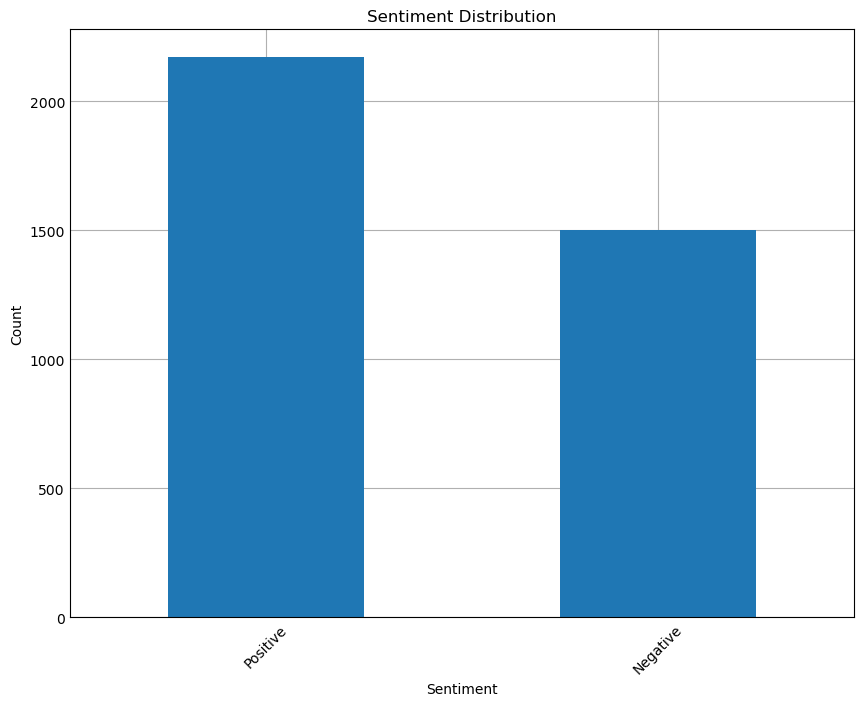

In [252]:
sentiment_counts = analyzed_df['Sentiments'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()